In [21]:
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

from utils.translate import translate

dataset_path = Path("data/animals10/raw-img") 

**Note**: The original translate dict `(data.animals10.translate.translate)` is missing multiple translations (e.g. "horse" -> "cavallo", etc.). So a new translate dict is created to fix this issue. The new translate dict is located in `utils/translate.py`.


## General info

In [22]:
classes = [translate.get(d.name) for d in dataset_path.iterdir() if d.is_dir()]
print(f"Classes: {classes}")

n_all = 0
for cls in classes:
    n = len(list((dataset_path / translate.get(cls)).glob("*")))
    print(f"{cls}: {n} images")
    n_all += n

print(f"\nTotal images: {n_all}")


Classes: ['chicken', 'spider', 'cat', 'butterfly', 'cow', 'horse', 'dog', 'sheep', 'squirrel', 'elephant']
chicken: 3098 images
spider: 4821 images
cat: 1668 images
butterfly: 2112 images
cow: 1866 images
horse: 2623 images
dog: 4863 images
sheep: 1820 images
squirrel: 1862 images
elephant: 1446 images

Total images: 26179


## Visualizing images

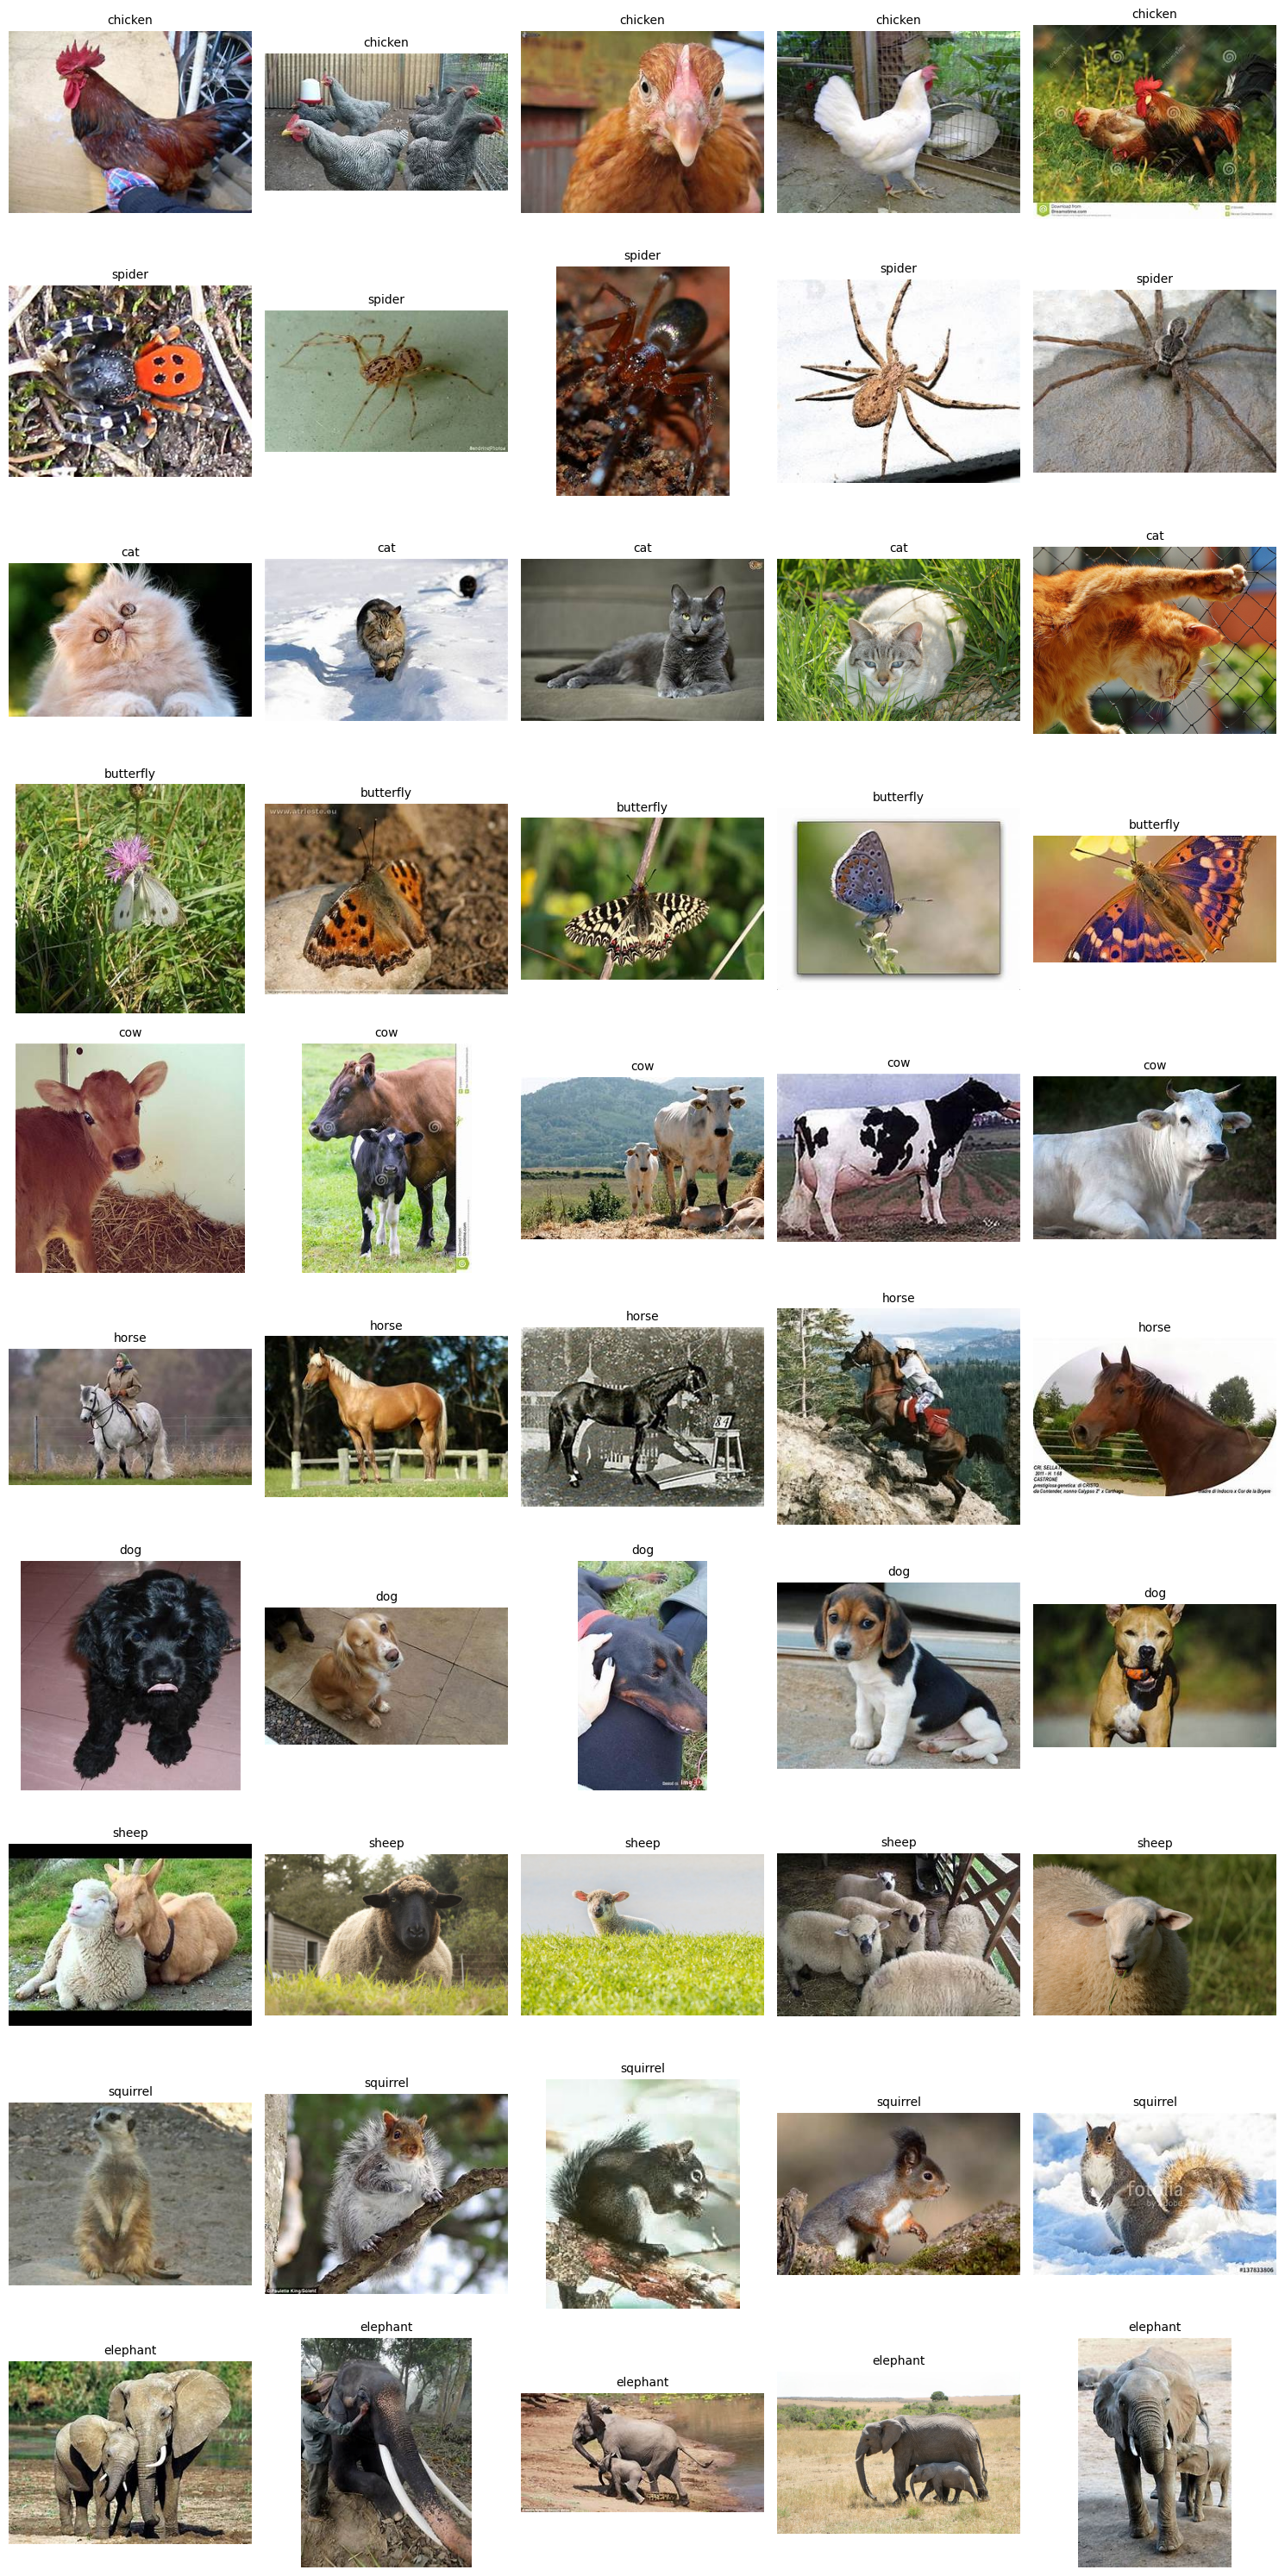

In [23]:
fig, axs = plt.subplots(len(classes), 5, figsize=(15, len(classes)*3))

for i, cls in enumerate(classes):
    images = list((dataset_path / translate.get(cls)).glob("*"))[:5]  
    for j, img_path in enumerate(images):
        img = Image.open(img_path)
        axs[i, j].imshow(img)
        axs[i, j].axis("off")
        axs[i, j].set_title(cls, fontsize=10)

plt.tight_layout()
plt.show()

## Analyzing img sizes

In [24]:
widths, heights, aspect_ratios = [], [], []
for cls in classes:
    for img_path in (dataset_path / translate.get(cls)).glob("*"):
        img = Image.open(img_path)
        widths.append(img.width)
        heights.append(img.height)
        aspect_ratios.append(img.width / img.height)

print(f"Width: mean = {np.mean(widths):.2f}, std = {np.std(widths):.2f}")
print(f"Height: mean = {np.mean(heights):.2f}, std = {np.std(heights):.2f}")
print(f"Aspect Ratio: mean = {np.mean(aspect_ratios):.2f}, std = {np.std(aspect_ratios):.2f}")


Width: mean = 320.04, std = 196.93
Height: mean = 252.63, std = 148.40
Aspect Ratio: mean = 1.31, std = 0.31


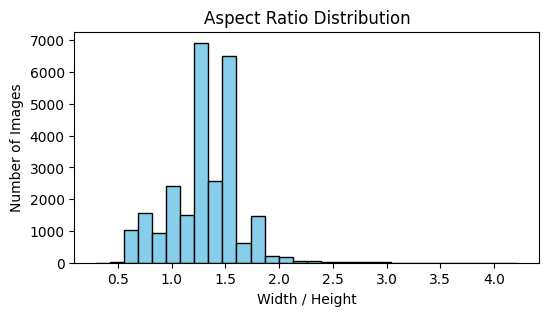

In [25]:
plt.figure(figsize=(6,3))
plt.hist(aspect_ratios, bins=30, color='skyblue', edgecolor='black')
plt.title("Aspect Ratio Distribution")
plt.xlabel("Width / Height")
plt.ylabel("Number of Images")
plt.show()

### Observations:

Images have different widths and heights, and the aspect ratio varies as well, meaning that simple resizing could lead to distorted images. Therefore, it is important to consider the aspect ratio when preprocessing images for training a model. To avoid distortion, a technique called "padding" or "cropping" can be used to maintain the aspect ratio while resizing the images.


## Class imbalance

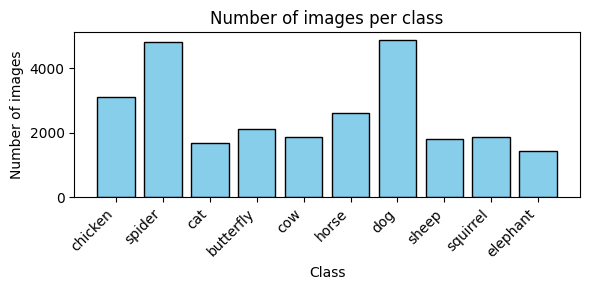

In [26]:
class_counts = {cls: len(list((dataset_path / translate.get(cls)).glob("*"))) for cls in classes}

plt.figure(figsize=(6,3))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of images")
plt.xlabel("Class")
plt.title("Number of images per class")
plt.tight_layout()
plt.show()

### Observations:

The dataset has imbalanced classes, with some classes having moderately more images than others. This could affect the performance of the model, as it may be biased towards the majority class. To address this, we can use techniques such as data augmentation, and class weighting. 


## Pixel intensity stats

In [27]:
r_means, g_means, b_means = [], [], []

for cls in classes:
    for img_path in (dataset_path / translate.get(cls)).glob("*"):
        img = Image.open(img_path).convert("RGB")
        arr = np.array(img)
        r_means.append(arr[:,:,0].mean())
        g_means.append(arr[:,:,1].mean())
        b_means.append(arr[:,:,2].mean())

print(f"Pixel Means -> R: {np.mean(r_means):.2f}, G: {np.mean(g_means):.2f}, B: {np.mean(b_means):.2f}")
print(f"Pixel Stds  -> R: {np.std(r_means):.2f}, G: {np.std(g_means):.2f}, B: {np.std(b_means):.2f}")


Pixel Means -> R: 132.01, G: 127.57, B: 105.20
Pixel Stds  -> R: 37.72, G: 35.58, B: 41.87


### Observations:

The dataset images are slightly warm-toned (more red/yellow than blue).

Overall, no extreme brightness or darkness issues are apparent.